<a href="https://colab.research.google.com/github/eherrador/llm-course-huggingface/blob/main/course/en/chapter1/section3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformers, what can they do?

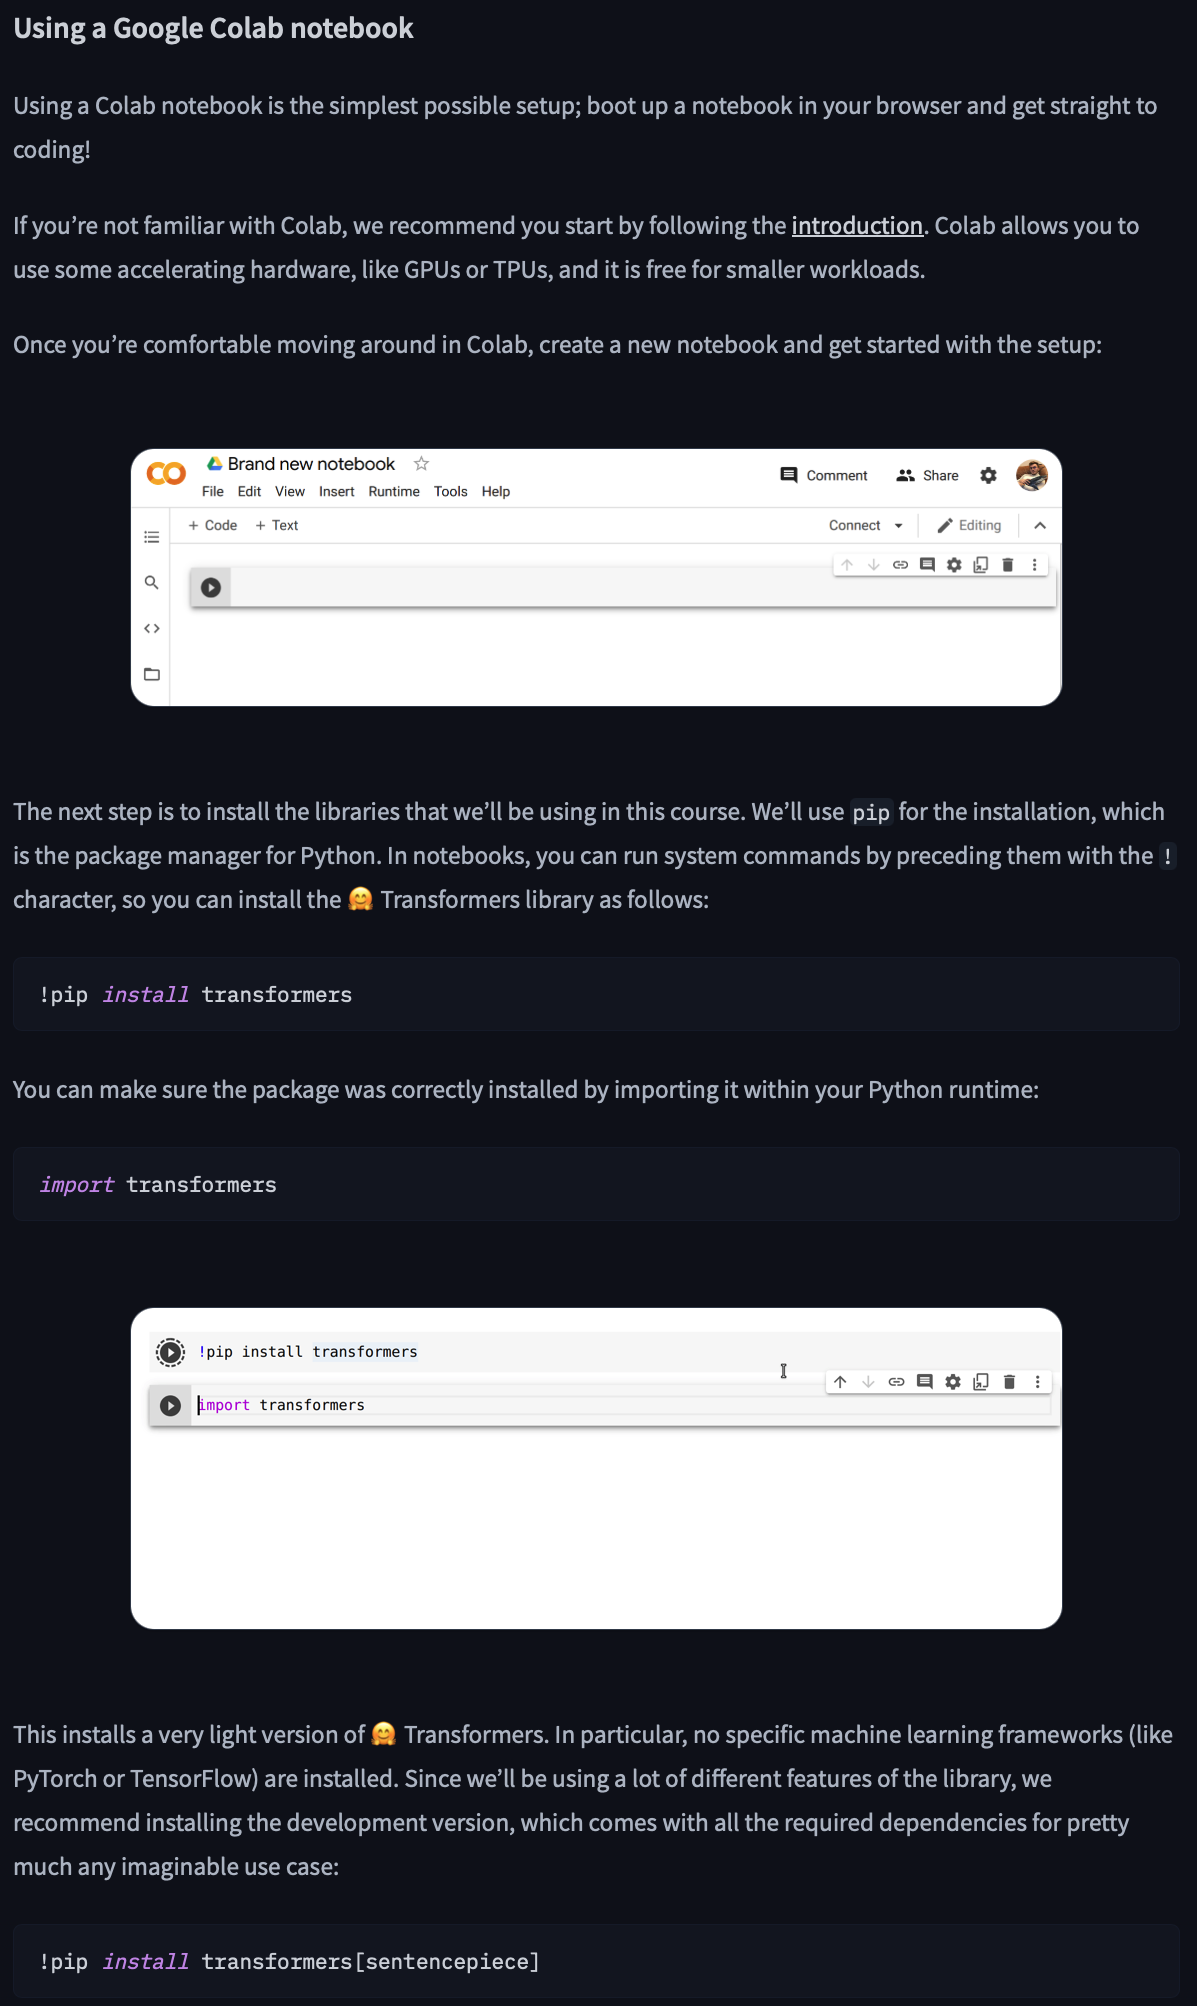

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

[{'label': 'POSITIVE', 'score': 0.9598047137260437}]

In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598047137260437},
 {'label': 'NEGATIVE', 'score': 0.9994558095932007}]

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445963859558105, 0.111976258456707, 0.043427448719739914]}

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

[{'generated_text': 'In this course, we will teach you how to understand and use '
                    'data flow and data interchange when handling user data. We '
                    'will be working with one or more of the most commonly used '
                    'data flows — data flows of various types, as seen by the '
                    'HTTP'}]

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

[{'generated_text': 'In this course, we will teach you how to manipulate the world and '
                    'move your mental and physical capabilities to your advantage.'},
 {'generated_text': 'In this course, we will teach you how to become an expert and '
                    'practice realtime, and with a hands on experience on both real '
                    'time and real'}]

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'sequence': 'This course will teach you all about mathematical models.',
  'score': 0.19619831442832947,
  'token': 30412,
  'token_str': ' mathematical'},
 {'sequence': 'This course will teach you all about computational models.',
  'score': 0.04052725434303284,
  'token': 38163,
  'token_str': ' computational'}]

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

[{'entity_group': 'PER', 'score': 0.99816, 'word': 'Sylvain', 'start': 11, 'end': 18}, 
 {'entity_group': 'ORG', 'score': 0.97960, 'word': 'Hugging Face', 'start': 33, 'end': 45}, 
 {'entity_group': 'LOC', 'score': 0.99321, 'word': 'Brooklyn', 'start': 49, 'end': 57}
]

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

{'score': 0.6385916471481323, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' America has changed dramatically during recent years . The '
                  'number of engineering graduates in the U.S. has declined in '
                  'traditional engineering disciplines such as mechanical, civil '
                  ', electrical, chemical, and aeronautical engineering . Rapidly '
                  'developing economies such as China and India, as well as other '
                  'industrial countries in Europe and Asia, continue to encourage '
                  'and advance engineering .'}]

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

[{'translation_text': 'This course is produced by Hugging Face.'}]